In [1]:
import matplotlib.pyplot as plt
import numpy as np

# to read the data
import pandas as pd

In [2]:
from visualization import plot_decision_boundary

In [3]:
data = pd.read_csv('data.csv')

# split the data into features and labels
X = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values

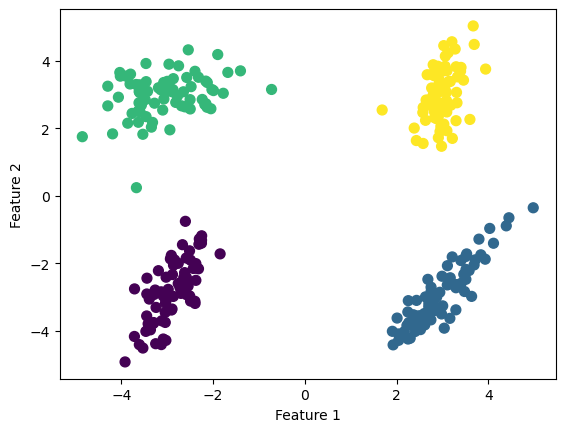

In [4]:
# visualize the data
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [5]:
from multiclass_svm import one_versus_all as ova

In [6]:
def linear_kernel(X, Z):
    """
    Computes the linear kernel between two matrices X and Z.

    Args:
        X: The first matrix, shape (n_samples_1, n_features).
        Z: The second matrix, shape (n_samples_2, n_features).

    Returns:
        The kernel matrix, shape (n_samples_1, n_samples_2).
    """

    return X @ Z.T

In [7]:
# Train a multi-class classifier using the one-versus-all strategy
W_ova, b_ova = ova(X, y, C=1.0, kernel=linear_kernel, eps=1e-5, max_iter=1000)

100%|██████████| 4/4 [00:57<00:00, 14.40s/it]


In [8]:
from methods import predict_ova

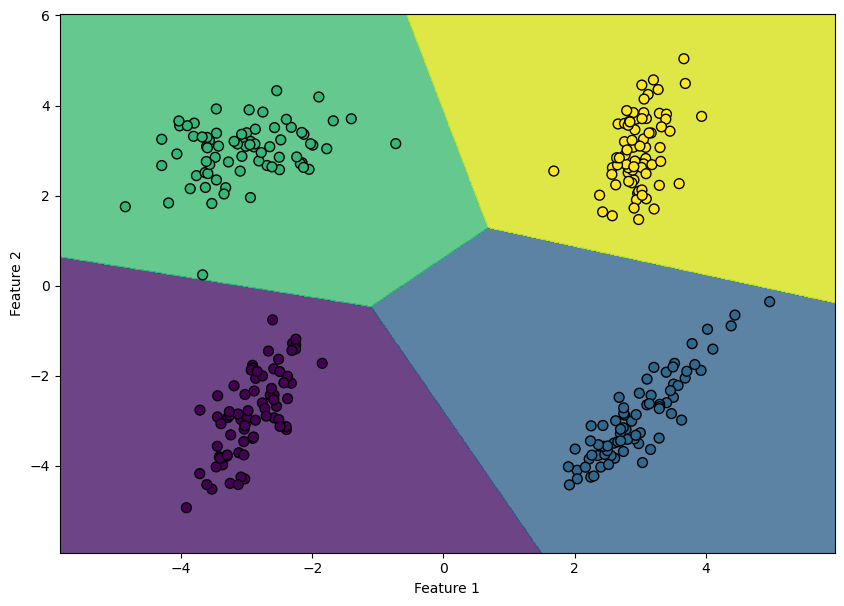

In [9]:
plot_decision_boundary(X, y, W_ova, b_ova, predict_ova)

In [10]:
from multiclass_svm import one_versus_one as ovo

In [11]:
# Train a multi-class classifier using the one-versus-one strategy
W_ovo, b_ovo = ovo(X, y, C=1.0, kernel=linear_kernel, eps=1e-5, max_iter=1000)

100%|██████████| 4/4 [00:35<00:00,  8.93s/it]


In [12]:
from methods import predict_ovo

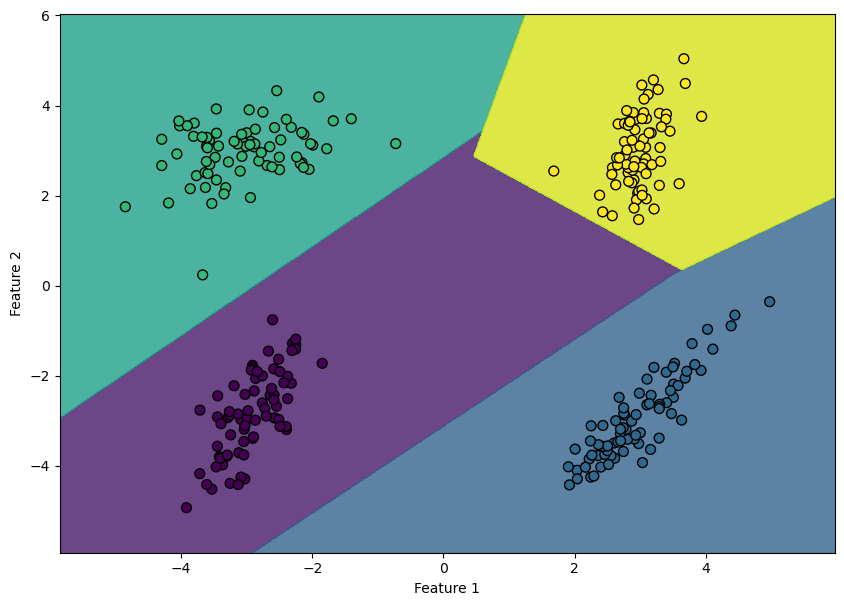

In [13]:
plot_decision_boundary(X, y, W_ovo, b_ovo, predict_ovo, additional_args=[np.unique(y)])

In [14]:
from multiclass_svm import error_correcting_output_codes as ecoc
from encoding_decoding import decoc_encoding, inverse_hamming_decoding

In [15]:
# Train a multi-class classifier using the Error-correcting output coding strategy
W_eco, b_eco, coding_matrix = ecoc(X, y, C=1.0, kernel=linear_kernel, eps=1e-5, max_iter=1000, encoding_function=decoc_encoding)

KeyboardInterrupt: 

In [ ]:
W_eco, b_eco, coding_matrix

(array([[-1.55834637, -1.58566712],
        [ 0.55867308, -0.5796642 ],
        [-0.96327415,  0.97343924],
        [ 1.23013663,  1.54942033]]),
 array([-4.62186655, -1.81196149, -2.7708838 , -5.01241464]),
 array([[ 1,  1, -1, -1],
        [ 1, -1,  1, -1]]))

: 

In [ ]:
from visualization import plot_decision_boundary
from methods import predict_ecoc

In [ ]:
plot_decision_boundary(X, y, W_eco, b_eco, predict_ecoc, additional_args=[coding_matrix, inverse_hamming_decoding])

binary_preds shape: (1417234, 2)
coding_matrix shape: (2, 3)


AxisError: axis 1 is out of bounds for array of dimension 0

In [ ]:
# from sklearn.datasets import make_classification
# import matplotlib.pyplot as plt

# # Generate a 4-class classification problem
# n_samples = 300  # number of samples
# n_features = 2  # number of features
# n_classes = 4  # number of classes
# random_state = 100  # for reproducibility
# noise = 0.00  # standard deviation of Gaussian noise added to the data

# X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_features, 
#                            n_redundant=0, n_repeated=0, n_classes=n_classes, n_clusters_per_class=1,
#                            random_state=random_state, flip_y=noise, class_sep=3)

# # Let's visualize the first two dimensions of the data
# plt.figure(figsize=(10, 7))
# scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('4-class classification data with noise')
# plt.legend(*scatter.legend_elements(), title="Classes")
# plt.show()

# # save the data
# data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))), columns=['Feature 1', 'Feature 2', 'Label'])

# data.to_csv('data.csv', index=False)